# Prediksi Pertumbuhan Pasien Covid 19 Dengan Metode Lagrange

## Hasil yang ingin dicapai:
Memprediksi pertumbuhan pasien covid 19 hingga bulan ke 8 atau bulan Agustus

## import semua library yangdiperlukan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### mengimport dan menampilkan data

In [2]:
df = pd.read_excel('Covid19-Sumsel.xlsx')

In [3]:
df.head()

,Hari,Tanggal,Positif,Sembuh,Meninggal
0,1,2020-03-24,1,0,0
1,2,2020-03-25,0,0,1
2,3,2020-03-26,0,0,0
3,4,2020-03-27,0,0,0
4,5,2020-03-28,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Hari       69 non-null     int64         
 1   Tanggal    69 non-null     datetime64[ns]
 2   Positif    69 non-null     int64         
 3   Sembuh     69 non-null     int64         
 4   Meninggal  69 non-null     int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 2.8 KB


In [5]:
df.keys()

Index(['Hari', 'Tanggal', 'Positif', 'Sembuh ', 'Meninggal'], dtype='object')

## ada kesalahan pada kolum  Sembuh, terdapat 1 white space kosong

### memperbaiki kolom sembuh

In [6]:
df.rename(columns=({'Sembuh ':'Sembuh'}),inplace=True)

In [7]:
df.keys()

Index(['Hari', 'Tanggal', 'Positif', 'Sembuh', 'Meninggal'], dtype='object')

## melihat apakah ada missing value

In [8]:
df.isnull().sum()

Hari         0
Tanggal      0
Positif      0
Sembuh       0
Meninggal    0
dtype: int64

 tidak ada missing value

## membuat kolom baru untuk menampung data berdasarkan bulan

mengubah format tanggal menjadi string untuk memudahkan pengambilan data bulan

In [9]:
df['Tanggal']=df['Tanggal'].astype(str)

### membuat kolom bulan untuk menampung data bulan

In [10]:
df['Bulan']=df['Tanggal'].apply(lambda bulan:bulan.split('-')[1][1])

mengubah tipe data pada bulan menjadi int

In [11]:
df['Bulan'].astype(int)

0     3
1     3
2     3
3     3
4     3
     ..
64    5
65    5
66    5
67    5
68    5
Name: Bulan, Length: 69, dtype: int32

In [12]:
Maret=df[df['Bulan']=='3'][['Positif','Sembuh','Meninggal']].sum()
April=df[df['Bulan']=='4'][['Positif','Sembuh','Meninggal']].sum()
Mei=df[df['Bulan']=='5'][['Positif','Sembuh','Meninggal']].sum()

In [13]:
bulan=['Maret','April','Mei']

In [14]:
Data=pd.DataFrame([Maret,April,Mei],index=bulan)

In [15]:
Data

,Positif,Sembuh,Meninggal
Maret,5,0,2
April,145,23,1
Mei,832,180,31


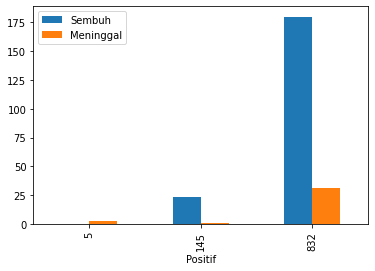

In [16]:
Data.plot('Positif',kind='bar');

## membuat fungsi lagrange untuk memprediksi jumlah pasien bulan 6,7,dan 8

In [17]:
def lagrange(bulan,pasien,prediksi):
    m = len(bulan)
    n = m - 1

    prediksi
    hasil_prediksi=0

    for i in range(n+1):
        polinom = 1
        for j in range(n+1):
            if j != i:
                polinom *= (prediksi - bulan[j]) / (bulan[i] - bulan[j])
        hasil_prediksi +=pasien[i]*polinom

    print(f'pada bulan ke-{int(prediksi)}\njumlah pasien adalah:{int(hasil_prediksi)}')

In [18]:
Data

,Positif,Sembuh,Meninggal
Maret,5,0,2
April,145,23,1
Mei,832,180,31


# Memprediksi Pasien Positif

In [19]:
Data['Positif']

Maret      5
April    145
Mei      832
Name: Positif, dtype: int64

In [20]:
# memprediksi bulan ke 6
lagrange([3, 4, 5],[5, 145, 832],6),
# memprediksi bulan ke 7
lagrange([3, 4, 5],[5, 145, 832],7),
# memprediksi bulan ke 8
lagrange([3, 4, 5],[5, 145, 832],8)

pada bulan ke-6
jumlah pasien adalah:2066
pada bulan ke-7
jumlah pasien adalah:3847
pada bulan ke-8
jumlah pasien adalah:6175


# Memprediksi Pasien Sembuh

In [21]:
Data['Sembuh']

Maret      0
April     23
Mei      180
Name: Sembuh, dtype: int64

In [22]:
# memprediksi bulan ke 6
lagrange([3, 4, 5],[0, 23, 180],6),
# memprediksi bulan ke 7
lagrange([3, 4, 5],[0, 23, 180],7),
# memprediksi bulan ke 8
lagrange([3, 4, 5],[0, 23, 180],8)

pada bulan ke-6
jumlah pasien adalah:471
pada bulan ke-7
jumlah pasien adalah:896
pada bulan ke-8
jumlah pasien adalah:1455


# Memprediksi Pasien Meninggal

In [23]:
Data['Meninggal']

Maret     2
April     1
Mei      31
Name: Meninggal, dtype: int64

In [24]:
# memprediksi bulan ke 6
lagrange([3, 4, 5],[2, 1, 31],6),
# memprediksi bulan ke 7
lagrange([3, 4, 5],[2, 1, 31],7),
# memprediksi bulan ke 8
lagrange([3, 4, 5],[2, 1, 31],8)

pada bulan ke-6
jumlah pasien adalah:92
pada bulan ke-7
jumlah pasien adalah:184
pada bulan ke-8
jumlah pasien adalah:307


# membuat data frame untuk memvisualisasikan

In [25]:
Juni=[2066,471,92]
Juli=[3847,896,184,]
Agustus=[6175,1455,307]

In [26]:
Data_tambahan=pd.DataFrame(data=[Juni,Juli,Agustus],index=(['Juni','Juli','Agustus']),
                           columns=(['Positif','Sembuh','Meninggal']))

In [27]:
Data_tambahan

,Positif,Sembuh,Meninggal
Juni,2066,471,92
Juli,3847,896,184
Agustus,6175,1455,307


In [34]:
Data_baru=pd.concat([Data,Data_tambahan],axis=0)

In [35]:
Data_baru

,Positif,Sembuh,Meninggal
Maret,5,0,2
April,145,23,1
Mei,832,180,31
Juni,2066,471,92
Juli,3847,896,184
Agustus,6175,1455,307


# Visualisasi Data

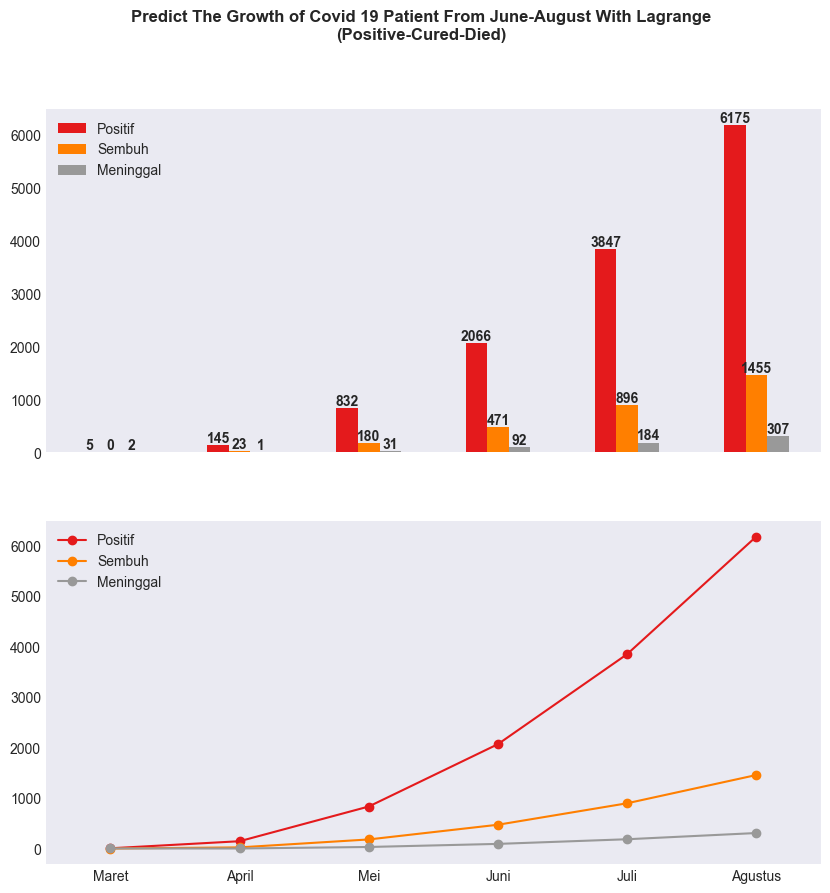

In [107]:
plt.style.use('seaborn-dark')
fig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(10,10),dpi=100,sharex=True)

ax=Data_baru.plot(ax=ax,kind='bar',cmap='Set1')
for container in ax.containers:
    ax.bar_label(container,fontweight='bold')
for label in ax.get_xticklabels():
    label.set(rotation=0)

ax1=Data_baru.plot(ax=ax1,cmap='Set1',marker='o')
    
fig.suptitle('Predict The Growth of Covid 19 Patient From June-August With Lagrange\n(Positive-Cured-Died)',fontweight='bold');
plt.savefig('Predict Of Covid Patient Growth.png')